# Imports:

In [39]:
import numpy as np
import gwinc  # Import the gwinc package for gravitational wave interferometer noise curves
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
from cycler import cycler
plt.style.use(['science','ieee','notebook'])
plt.rcParams.update({'figure.dpi': 300})
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF', '#9A0EEA'])
plt.rcParams.update({'font.serif': 'serif', 'font.family' : 'DeJavu Serif'})
plt.rcParams.update({
        'font.size': 21,
        'axes.labelsize': 21,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 16
    })

# Graphing Code:

In [41]:
def plot_LIGO(y_data_list, rangE, freq, label_list):
    # Plot the ASDs by looping through the input NSR list and plotting every array value
    plt.figure(figsize=(10, 8))
    # plt.plot(freq, y_data_list[0], '--', label= label_list[0], color = 'midnightblue')
    i=0 #=1
    while i< len(y_data_list)-1:
        plt.plot(freq, y_data_list[i], label= label_list[i])
        i+=1
    plt.plot(freq, y_data_list[-1], '--', label= label_list[-1])
    # plt.plot(freq, y_data_list[-1], label= label_list[-1], color='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='major', linestyle='-', linewidth=0.75)
    plt.grid(False, which='minor')  # Disable grid lines for minor ticks
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'ASD ($1/\sqrt{\text{Hz}}$)')
    plt.ylim(1e-24, 1e-19)
    plt.xlim(1e1, 1e5)
    plt.legend(frameon=True, ncols=2, loc='upper left', title='aLIGO detuning angles')
    plt.tick_params(which='both',  direction = 'out', top=False, left=True, right=False, bottom=True)
    # plt.savefig('Detuning aLIGO.pdf',format='pdf', dpi=300)
    plt.show()
    
    return

# aLIGO Detuning Code:

In [13]:
def detuneLIGO(rangee, budget, frequencies, label, y_data_list, F_LIGO):
    for i in rangee:
        budget.ifo.update({
            'Optics.SRM.Tunephase': i*np.pi/180,
        })
        trace = budget.run()
        fig = trace.plot()
        ax = fig.axes[0]
        plt.close(fig)
        first_line = ax.get_lines()[0]
        y1_data = first_line.get_ydata()/F_LIGO
        y_data_list.append(y1_data)
        label.append(f'$\phi$={(i-180)//2}')
        
    return y_data_list, label

# Initialize Inputs and Obtain ASD Curves:

In [32]:
# Now detuning aLIGO/GEO600 and seeing the affect on the actual strain ASD
freq = np.logspace(0, 5, 100000)
budget = gwinc.load_budget('aLIGO', freq=freq)
rangE = [210,240,270,300,330,360] # excluding 0 (tuned) - always calculated
y_data_list = []
label = []

# Load in the antenna pattern arrays for GEO600 and LIGO:
with np.load('GEO_F_rms_100000_05.npz') as data:
        F_GEO = data['F_rms']
with np.load('LIGO_F_rms_100000_05.npz') as data:
        F_LIGO = data['F_rms']


# with np.load('ASD_50W_100000_05.npz') as data:
#     asd_array2 = data[f'GEO600']/F_GEO  # ASD array was made with Finnese's normal-incidence GW response pattern removed
#     label.append('Tuned')
#     y_data_list.append(asd_array2)
#     for phi in rangE:
#         asd_array = data[f'GEO600_{phi}']/F_GEO
#         y_data_list.append(asd_array)
#         label.append(f'$\phi$={phi}')
#     asd_array3 = data[f'GEO600 Scanned']/F_GEO
#     label.append('Scanned')
#     y_data_list.append(asd_array3)

y_data_list, label = detuneLIGO(rangE, budget, freq, label, y_data_list, F_LIGO)
label.pop(-1)
label.append('Tuned')

# Plot Results:

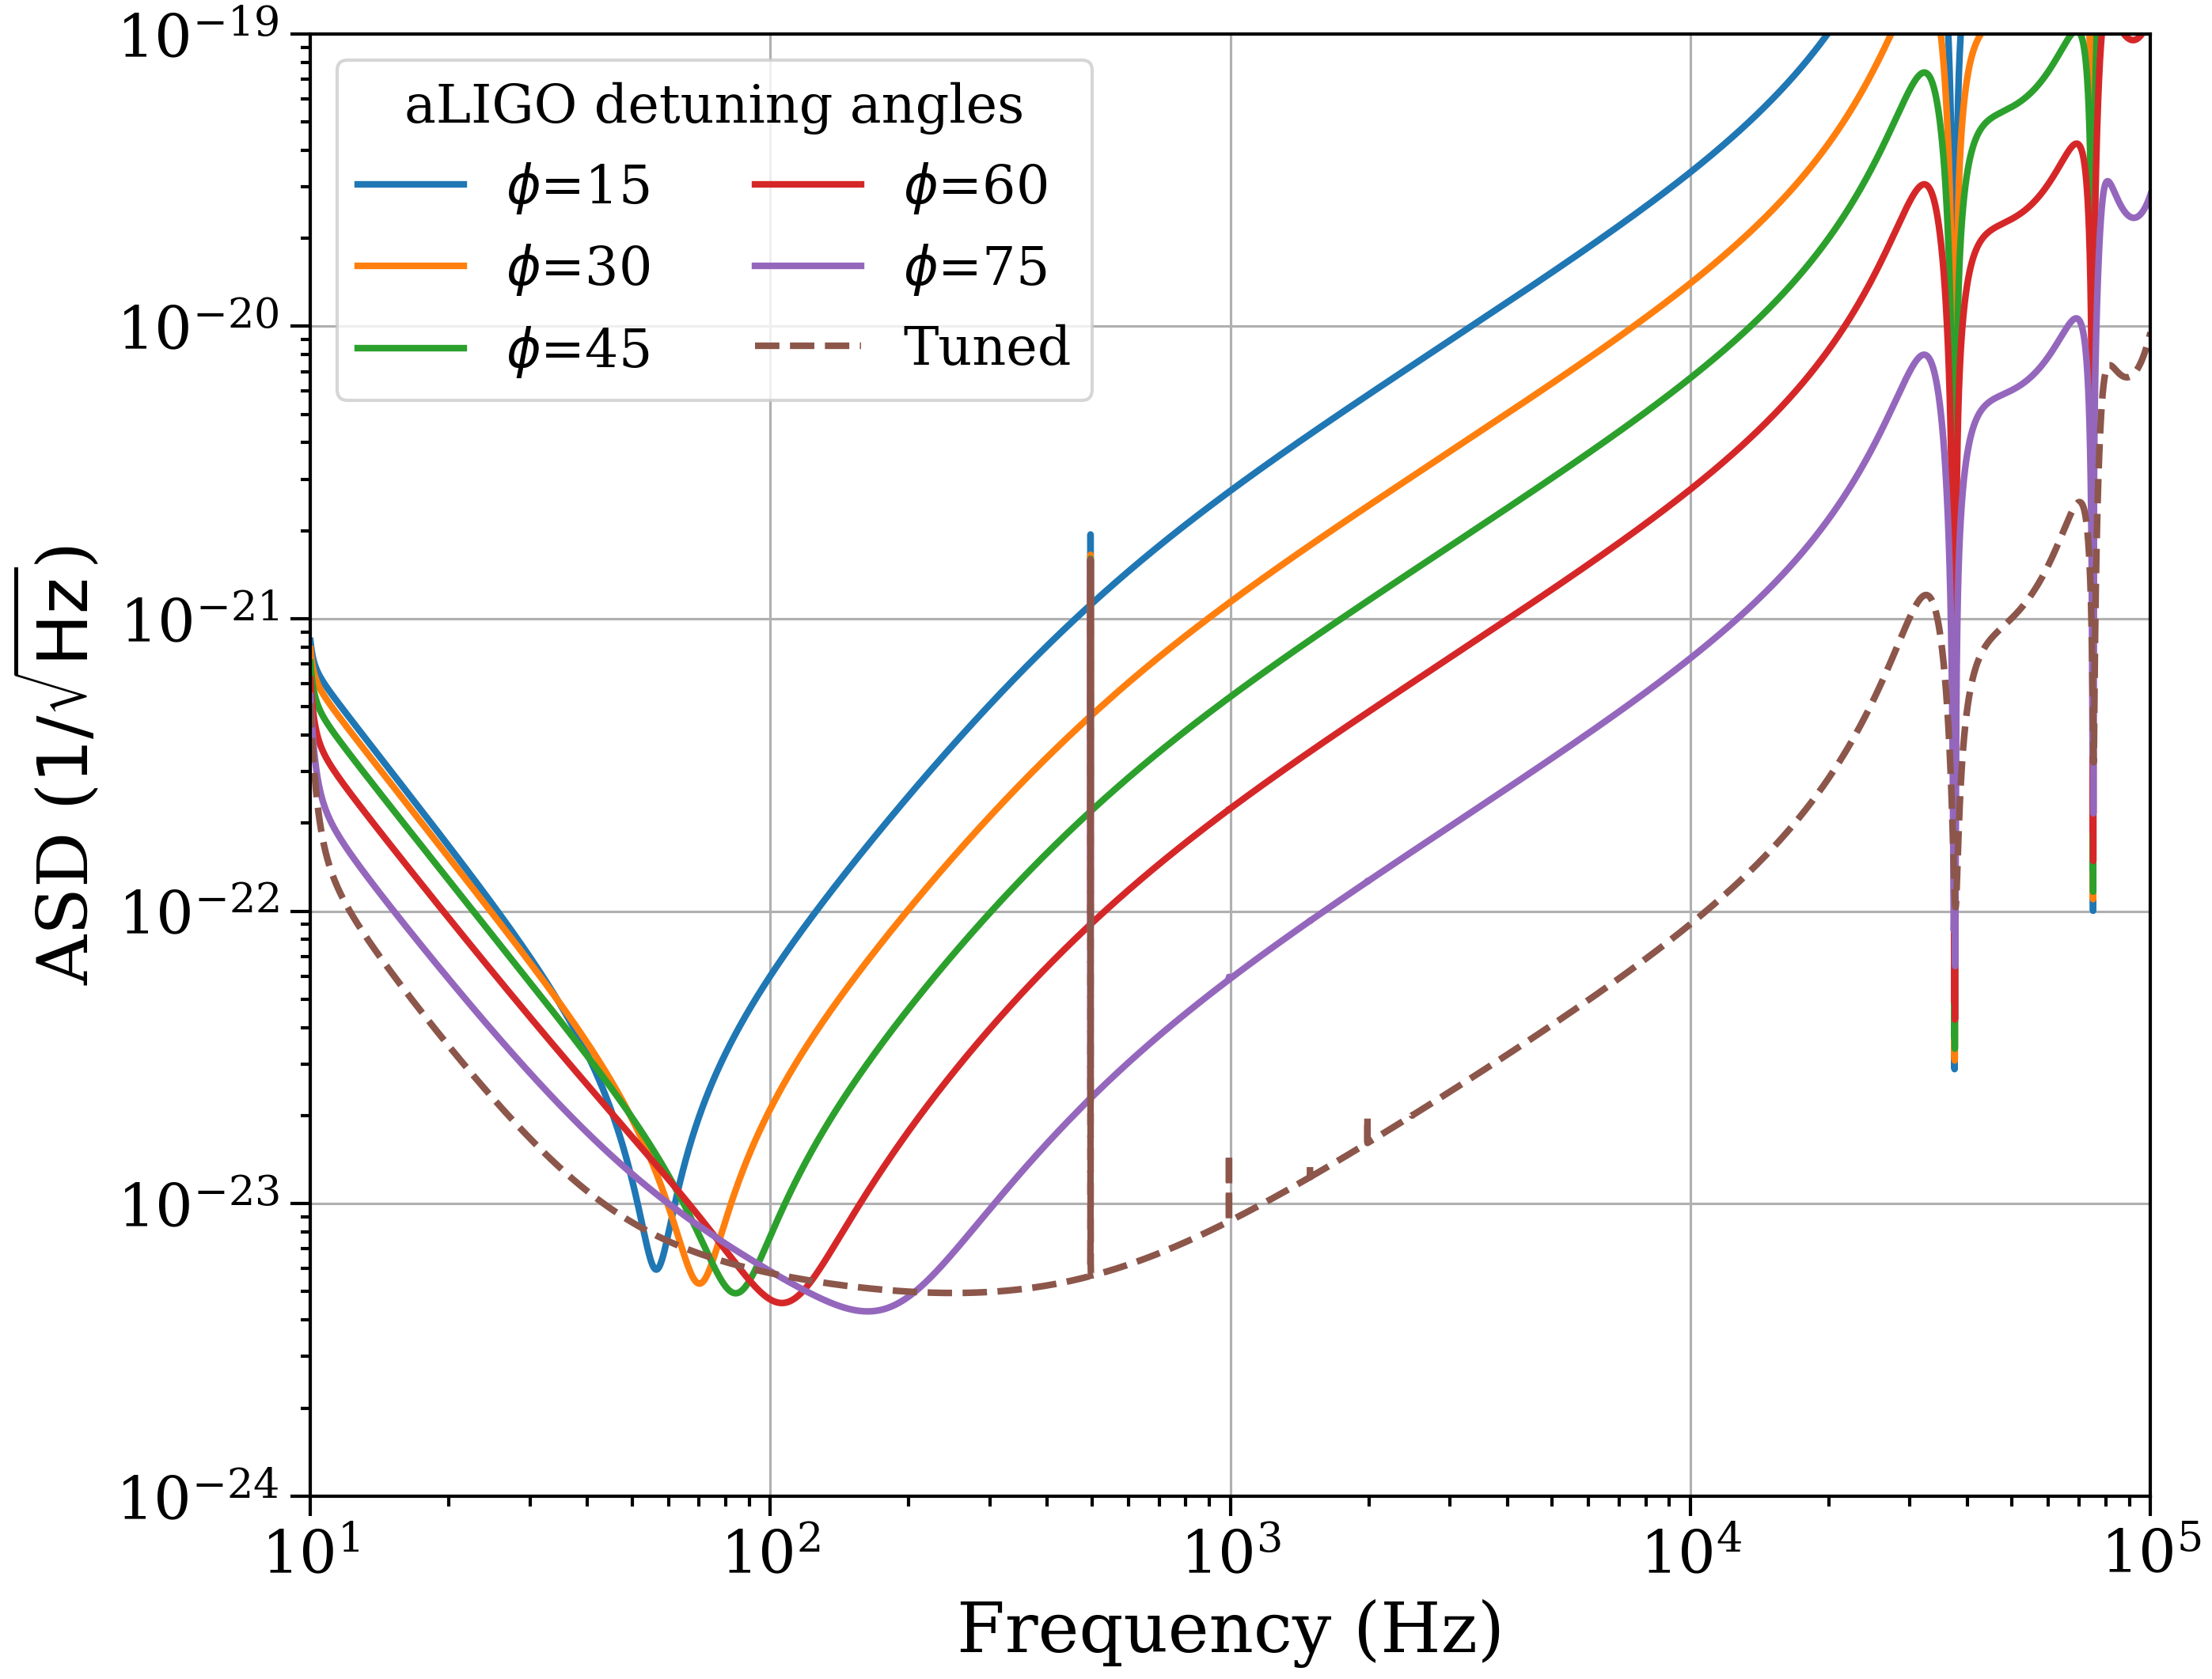

In [42]:
plot_LIGO(y_data_list, rangE, freq, label)